In [1]:
import gpflow
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append('../')
from GPHetero import hetero_kernels, hetero_likelihoods, hetero_gpmc

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

In [2]:
class Ex1Func(object):
    
    def __init__(self, sigma=lambda x: 0.5):
        self.sigma = sigma

    def __call__(self, x):
        
        if x[0] < 0.5:
            return x[0]**2. +  self.sigma(x[0]) * np.random.randn()
        if x[0] == 0.5:
            return 1.
        if x[0] > 0.5:
            return 2. - (x[0]-0.5) ** 2.

In [3]:
from pyDOE import *

Text(0,0.5,u'$y$')

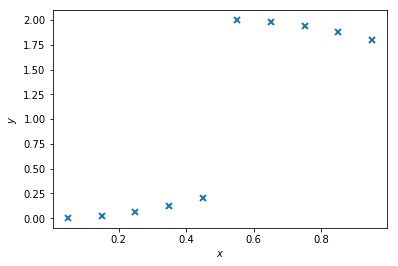

In [4]:
dim = 1
n = 10
noise=0
sigma = eval('lambda x: ' + str(noise))
objective = Ex1Func(sigma=sigma)
X = lhs(dim, n , criterion='center')
Y = np.array([objective(x) for x in X])[:, None]



#Xm = np.mean(X)
#Xv = np.std(X)
Xnorm = (X - 0.5) / 0.5

fig, ax = plt.subplots()
ax.plot(X, Y, 'x', markeredgewidth=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [5]:
#build the model
k1 = hetero_kernels.RBF(1)
nonstat = hetero_kernels.NonStationaryLengthscaleRBF()
m = hetero_gpmc.GPMCAdaptiveLengthscale(Xnorm, Y, k1, nonstat)

In [6]:
m

Name,values,prior,constraint
adaptive_lengthscale_gp.V1,[[ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp.V2,[[ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.] [ 0.]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp.kern1.lengthscales,[ 1.],None,+ve
adaptive_lengthscale_gp.kern1.variance,[ 1.],None,+ve
adaptive_lengthscale_gp.likelihood.variance,[ 1.],None,+ve
adaptive_lengthscale_gp.nonstat.signal_variance,[ 1.],None,+ve


In [7]:
m.kern1.lengthscales = 0.5
m.kern1.lengthscales.fixed = True
m.kern1.variance = .1
m.kern1.variance.fixed = True
#m.kern1.lengthscales.prior = gpflow.priors.Gamma(1., 1.)
m.kern1.variance.prior = gpflow.priors.Gamma(1., 1.)

m.likelihood.variance = 0.01
m.likelihood.variance.fixed = True

#m.nonstat.signal_variance = 2.
#m.nonstat.signal_variance.fixed = True
m.nonstat.signal_variance.prior = gpflow.priors.Gamma(1., 1.)

In [8]:
m.optimize(maxiter=5000) # start near MAP

      fun: array([ 19.19615481])
 hess_inv: <21x21 LbfgsInvHessProduct with dtype=float64>
      jac: array([  8.50915514e-04,  -9.37425151e-04,   1.30640592e-03,
         8.12291465e-04,   8.27329819e-04,   4.00038821e-04,
        -1.09611031e-04,  -6.93148655e-05,   5.11511605e-05,
        -2.09680361e-05,  -1.64914504e-03,  -3.01132757e-03,
         2.25868201e-03,  -1.77328462e-03,  -1.22170752e-04,
         1.54204136e-03,  -1.58553069e-03,  -1.05106287e-03,
         1.61607711e-03,  -9.64565072e-04,  -6.41985361e-04])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 215
      nit: 194
   status: 0
  success: True
        x: array([-2.99947708,  2.0955046 , -0.35821871, -0.96487838, -0.58388631,
       -0.45355707,  0.09563626,  0.05827268, -0.07226001, -0.01442558,
        1.1471015 ,  0.11734137, -0.21673221,  0.65329394, -0.02514494,
       -0.55332362, -0.34722596,  0.45841852, -0.44480479,  1.82916609,
        3.08345204])

In [9]:
m

Name,values,prior,constraint
adaptive_lengthscale_gp.V1,[[-2.99947708] [ 2.0955046 ] [-0.35821871] [-0.96487838] [-0.58388631] [-0.45355707] [ 0.09563626] [ 0.05827268] [-0.07226001] [-0.01442558]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp.V2,[[ 1.1471015 ] [ 0.11734137] [-0.21673221] [ 0.65329394] [-0.02514494] [-0.55332362] [-0.34722596] [ 0.45841852] [-0.44480479] [ 1.82916609]],"N([ 0.],[ 1.])",(none)
adaptive_lengthscale_gp.kern1.lengthscales,[ 0.5],None,[FIXED]
adaptive_lengthscale_gp.kern1.variance,[ 0.1],"Ga([ 1.],[ 1.])",[FIXED]
adaptive_lengthscale_gp.likelihood.variance,[ 0.01],None,[FIXED]
adaptive_lengthscale_gp.nonstat.signal_variance,[ 3.12823602],"Ga([ 1.],[ 1.])",+ve


In [10]:
samples = m.sample(2000, verbose=True, epsilon=0.005, thin = 2, burn = 1000, Lmax = 160)

burn-in sampling started
Iteration:  100 	 Acc Rate:  96.0 %
Iteration:  200 	 Acc Rate:  99.0 %
Iteration:  300 	 Acc Rate:  100.0 %
Iteration:  400 	 Acc Rate:  99.0 %
Iteration:  500 	 Acc Rate:  99.0 %
Iteration:  600 	 Acc Rate:  100.0 %
Iteration:  700 	 Acc Rate:  99.0 %
Iteration:  800 	 Acc Rate:  100.0 %
Iteration:  900 	 Acc Rate:  100.0 %
Iteration:  1000 	 Acc Rate:  99.0 %
burn-in sampling ended
Iteration:  100 	 Acc Rate:  98.0 %
Iteration:  200 	 Acc Rate:  100.0 %
Iteration:  300 	 Acc Rate:  100.0 %
Iteration:  400 	 Acc Rate:  100.0 %
Iteration:  500 	 Acc Rate:  100.0 %
Iteration:  600 	 Acc Rate:  100.0 %
Iteration:  700 	 Acc Rate:  98.0 %
Iteration:  800 	 Acc Rate:  100.0 %
Iteration:  900 	 Acc Rate:  100.0 %
Iteration:  1000 	 Acc Rate:  100.0 %
Iteration:  1100 	 Acc Rate:  100.0 %
Iteration:  1200 	 Acc Rate:  100.0 %
Iteration:  1300 	 Acc Rate:  99.0 %
Iteration:  1400 	 Acc Rate:  99.0 %
Iteration:  1500 	 Acc Rate:  100.0 %
Iteration:  1600 	 Acc Rate:  

In [11]:
xnew = np.linspace(0,1,50)[:,None]
xx = (xnew - 0.5)/0.5

In [12]:
sample_df = m.get_samples_df(samples)

In [13]:
sample_df

,adaptive_lengthscale_gp.V1,adaptive_lengthscale_gp.V2,adaptive_lengthscale_gp.kern1.lengthscales,adaptive_lengthscale_gp.kern1.variance,adaptive_lengthscale_gp.likelihood.variance,adaptive_lengthscale_gp.nonstat.signal_variance
0,"[[-1.09112647411], [3.1087614444], [-1.0063656...","[[1.63498435606], [-0.0944423155414], [-0.5432...",[0.5],[0.1],[0.01],[1.77327279389]
1,"[[-0.568420412631], [2.65050486869], [-0.39265...","[[1.31107744132], [-0.237323771221], [-0.59099...",[0.5],[0.1],[0.01],[2.56765626508]
2,"[[-1.11800865607], [2.87318906583], [-0.569591...","[[1.11920721572], [0.0375689019204], [-0.39055...",[0.5],[0.1],[0.01],[3.35256540389]
3,"[[-0.865989529549], [2.3142406075], [-0.431907...","[[1.18978819849], [-0.0867172793278], [-0.5810...",[0.5],[0.1],[0.01],[2.90654316417]
4,"[[-1.95778180101], [2.94732488456], [-0.583299...","[[1.10186525822], [-0.107713661547], [-0.29770...",[0.5],[0.1],[0.01],[3.70278106406]
5,"[[-1.73258208354], [2.89439931027], [-0.493395...","[[1.15696317147], [-0.0966149625059], [-0.2440...",[0.5],[0.1],[0.01],[3.4310829476]
6,"[[-1.99992915207], [2.88016173937], [-0.679067...","[[1.12188138047], [0.0499760211264], [-0.19754...",[0.5],[0.1],[0.01],[3.17400168733]
7,"[[-2.92270627842], [2.65479105659], [-0.702484...","[[1.30133491462], [0.0730796041554], [-0.16489...",[0.5],[0.1],[0.01],[2.36901661776]
8,"[[-2.01199712026], [2.71900433792], [-1.218814...","[[1.68774039989], [0.0365658800507], [-0.26403...",[0.5],[0.1],[0.01],[1.42990118356]
9,"[[-3.22872681603], [2.46493112528], [-1.217749...","[[2.04530815926], [0.440599394767], [-0.263332...",[0.5],[0.1],[0.01],[1.02860649266]


In [14]:
mean_l_mat = np.zeros(shape = (samples.shape[0], xx.shape[0]))
var_l_mat = np.zeros(shape = (samples.shape[0], xx.shape[0]))

In [15]:
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    mean1, v1 = m.predict_l(xx)
    var1 = v1[:,:]
    mean_l_mat[i,:] = mean1[:,0]
    var_l_mat[i,:] = np.diag(var1)

std_l_mat = np.sqrt(var_l_mat)

In [16]:
LowerlogL = mean_l_mat - 2*std_l_mat
UpperlogL = mean_l_mat + 2*std_l_mat

In [17]:
MeanL = np.exp(mean_l_mat)
LowerL = np.exp(LowerlogL)
UpperL = np.exp(UpperlogL)

In [18]:
mean_f_mat = np.zeros(shape = (samples.shape[0], xx.shape[0]))
var_f_mat = np.zeros(shape = (samples.shape[0], xx.shape[0]))

for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    mean1, v1 = m.predict_f(xx)
    var1 = v1[:,:]
    mean_f_mat[i,:] = mean1[:,0]
    var_f_mat[i,:] = np.diag(var1)

sig_samples = m.nonstat.signal_variance.get_samples_df(samples)
noise_samples = m.likelihood.variance.get_samples_df(samples)
signal_var = np.array([])
noise_var = np.array([])
for s in sig_samples:
    signal_var = np.append(signal_var, s)

for n in noise_samples:
    noise_var = np.append(noise_var, n)
    

In [19]:
def visualize(Xgrid, Mgrid, Vargrid, noise_var):
    """
    Visualize 1D utility funciton values
    Xgrid : grid states
    Mgrid : mean of GP at those finite grid points
    Vargrid : variance of GP at those finite grid points
    """
    Std_noise = np.sqrt(noise_var)
    signal_std = np.sqrt(signal_var)
 
    Stdgrid = np.sqrt(Vargrid)
    
    lower = Mgrid - 2*Stdgrid
    upper = Mgrid + 2*Stdgrid
    
    lower1 = lower - 2*Std_noise
    upper1 = upper + 2*Std_noise
    
    plt.plot(X, Y, '.')
    line, = plt.plot(Xgrid, Mgrid, lw = 2, color = 'b', label = 'utility', alpha = 0.5)
    plt.fill_between(Xgrid[:,0], lower, upper,
                     color = 'b', alpha = 0.05)
    #plt.fill_between(Xgrid[:,0], lower1, upper1,
    #                 color = 'g', alpha = 0.25)
    plt.xlabel('x')
    plt.ylabel('y')
    return

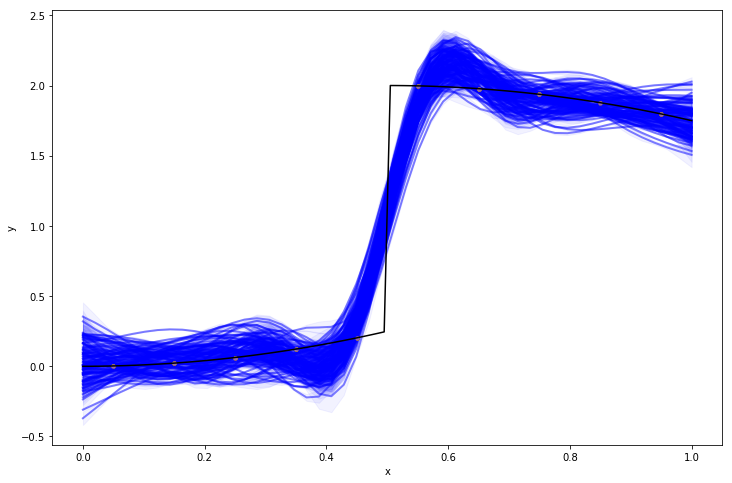

In [25]:
X_true = np.linspace(0,1,100)[:,None]
Y_true = np.array([objective(x) for x in X_true])[:, None]

mini = 205
maxi = 300
plt.figure(figsize=(12,8))

for i in xrange(mini,maxi):
    visualize(xnew, mean_f_mat[i,:], var_f_mat[i,:], noise_var[i])  
plt.plot(X_true, Y_true, 'k')

In [22]:
def visualize_l(Xgrid, M, L, U):
    """
    Visualize 1D utility funciton values
    Xgrid : grid states
    Mgrid : mean of GP at those finite grid points
    Vargrid : variance of GP at those finite grid points
    """
    
    line, = plt.plot(Xgrid, M, lw = 2, color = 'b', label = 'utility', alpha = 0.5)
    plt.fill_between(Xgrid[:,0], L, U,
                     color = 'b', alpha = 0.25)
    #plt.fill_between(Xgrid[:,0], lower1, upper1,
    #                 color = 'g', alpha = 0.25)
    plt.xlabel('x')
    plt.ylabel('y')
    return

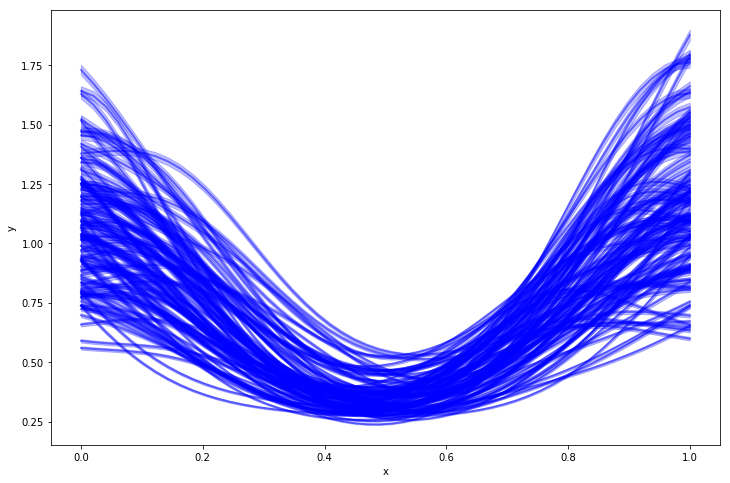

In [27]:
mini = 200
maxi = 300
plt.figure(figsize=(12,8))
for i in xrange(mini,maxi):
    visualize_l(xnew, MeanL[i,:], LowerL[i,:], UpperL[i,:])  